In [28]:
import pandas as pd

#read csv dataset
diabetes_dataset_df = pd.read_csv('datasets/diabetes.csv',sep='\t')

In [29]:
diabetes_dataset_df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [30]:
#understand nature of data
diabetes_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [31]:
#find all null values
diabetes_dataset_df.isnull().sum()

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

In [32]:
#transform dataset
diabetes_dataset_df['is_diabetic'] = diabetes_dataset_df['Y'] > 100

In [33]:
diabetes_dataset_df.drop(columns=['Y'],inplace=True)

In [34]:
diabetes_dataset_df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,is_diabetic
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,True
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,False
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,True
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,True
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,True


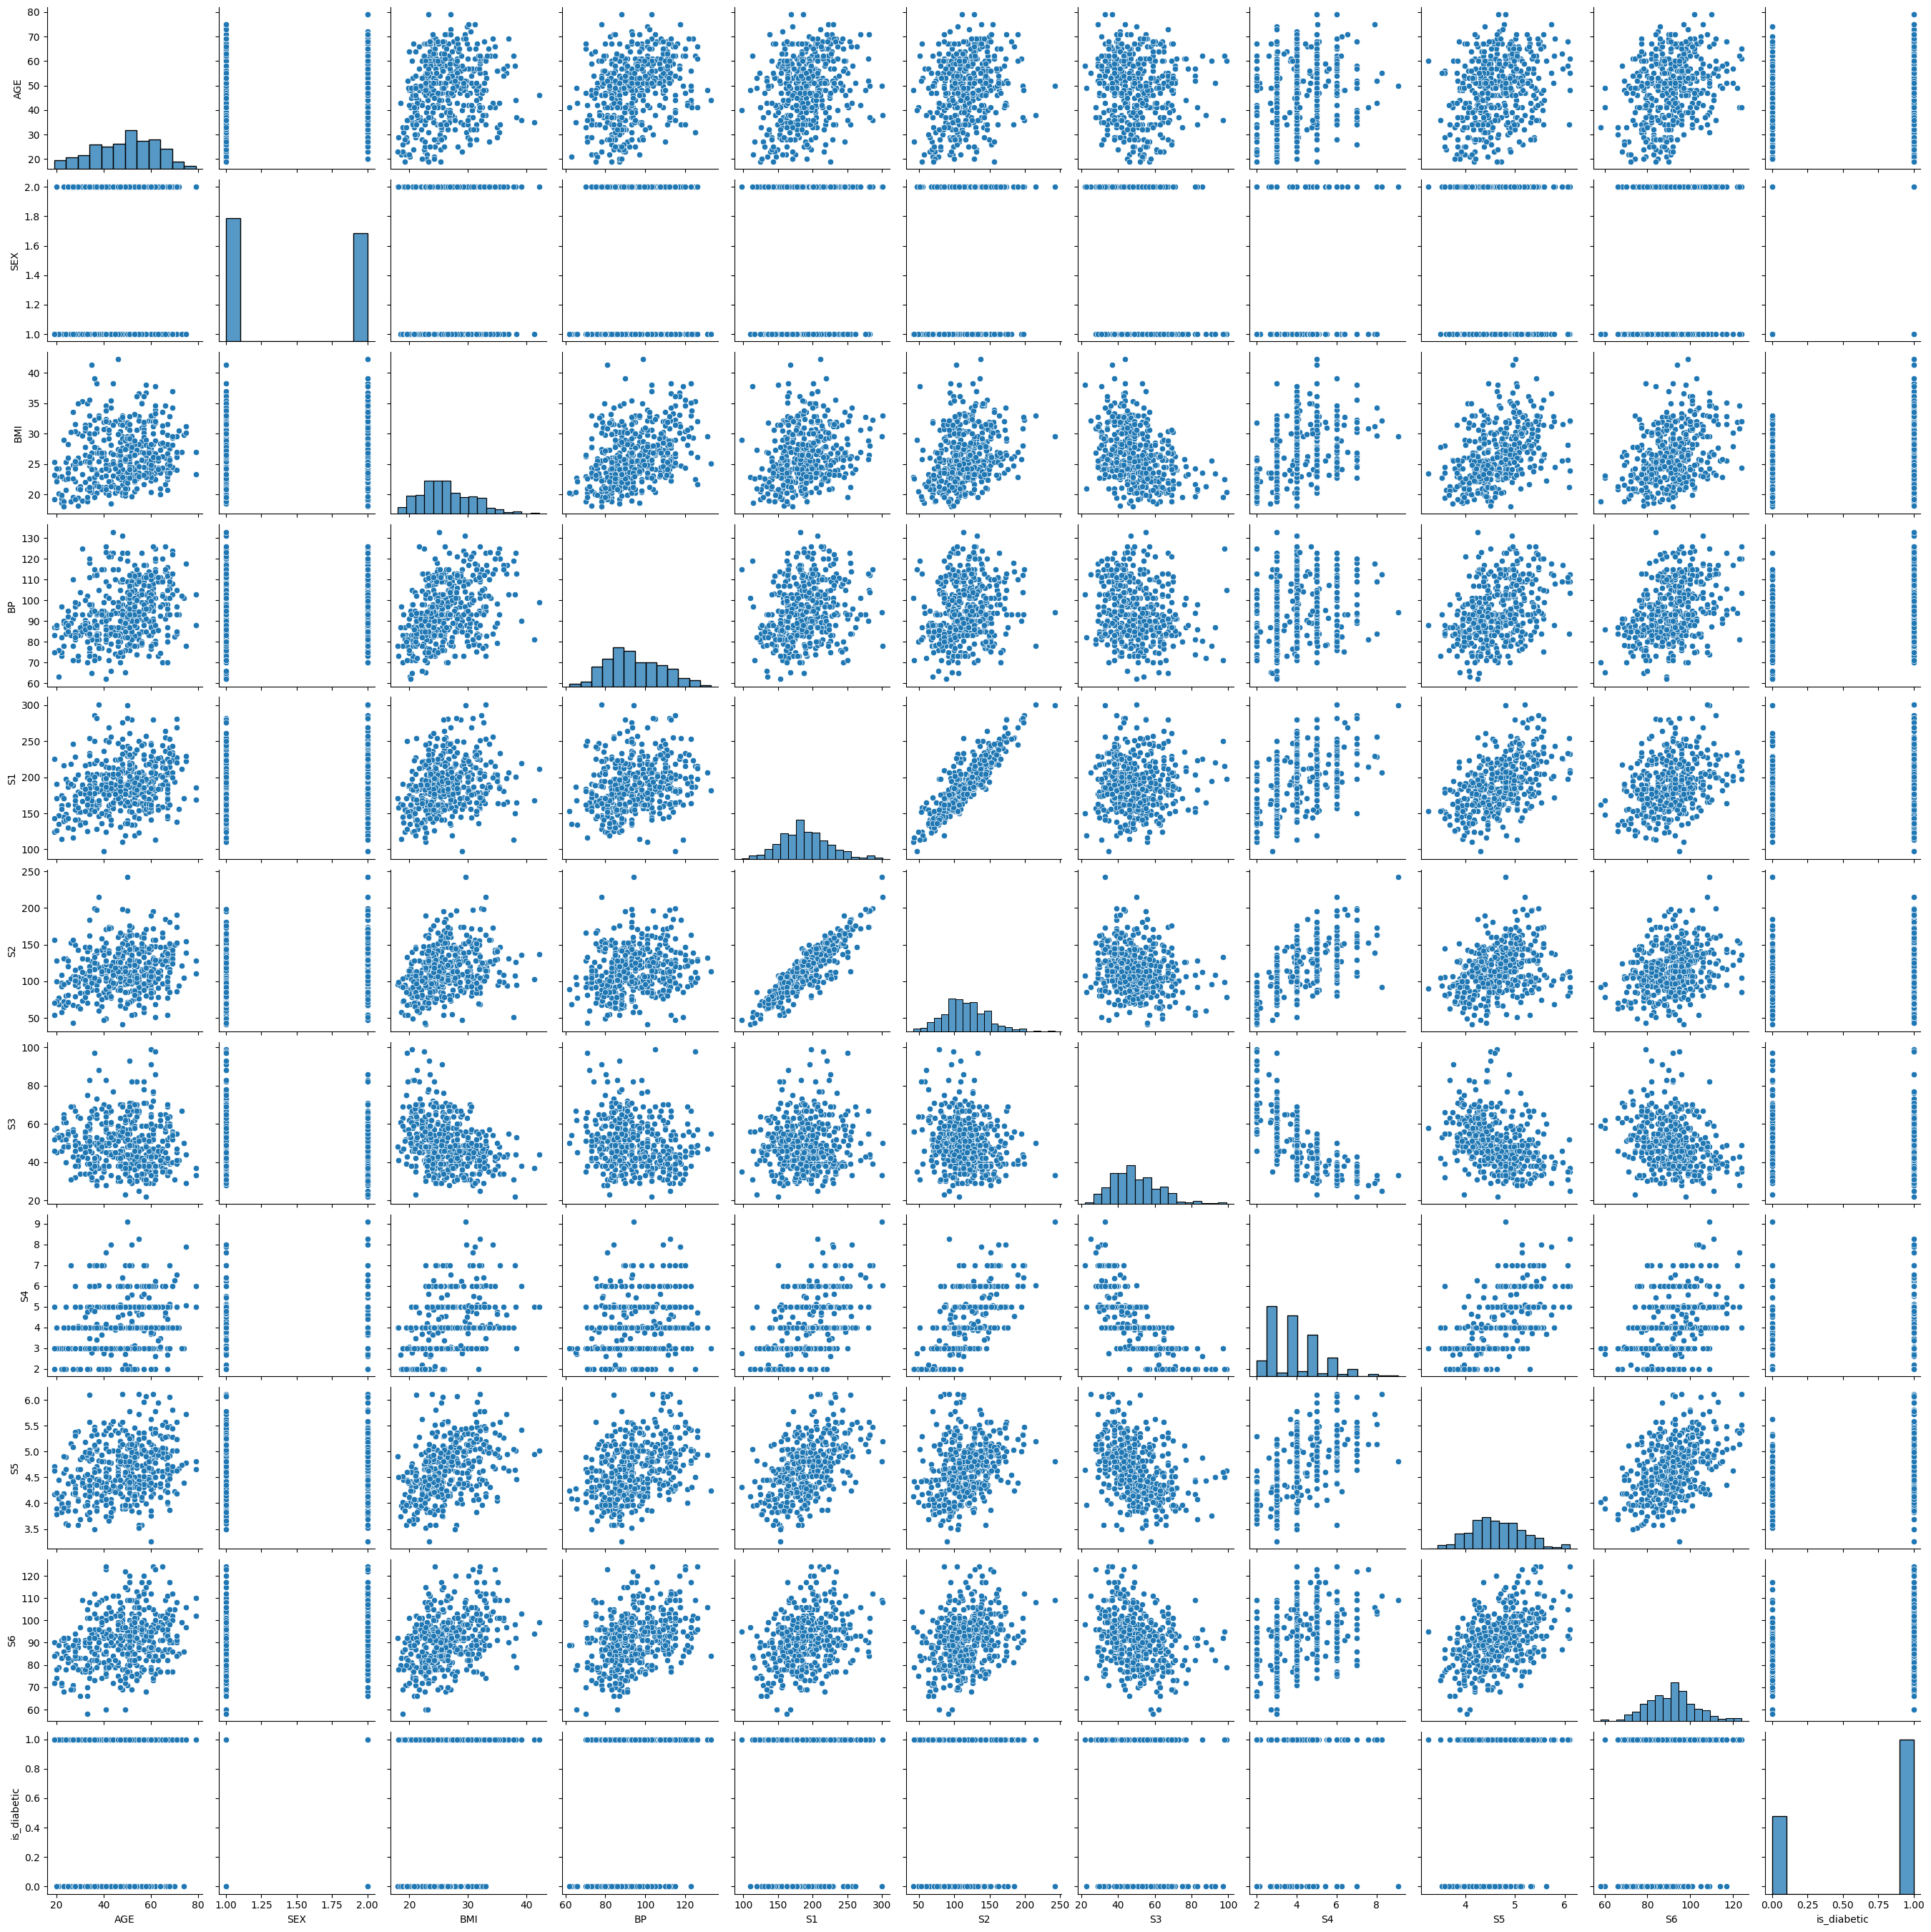

In [35]:
import seaborn as sb

sb.pairplot(diabetes_dataset_df)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

rand_state = 30#30 increases the accuracy of model from 73 to 78
X = diabetes_dataset_df[['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']]
Y = diabetes_dataset_df['is_diabetic']

#80% of data is used for training and 20% is used for testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=rand_state)

#build and train model
model = LogisticRegression(random_state=rand_state)
model.fit(X_train,Y_train)


d:\GitHub\MyMLMarathon\mymlenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=30)

In [54]:
#get accuracy
model.score(X_test,Y_test)

0.7865168539325843

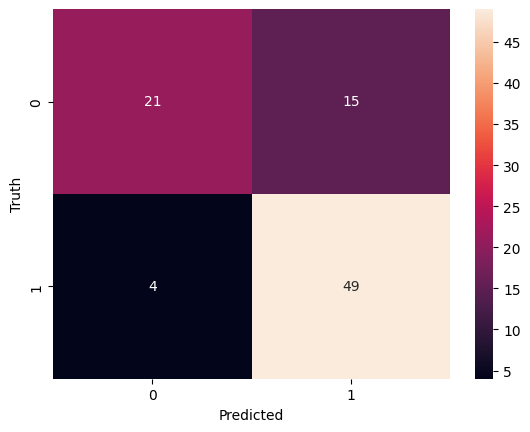

In [66]:
#validate model
from sklearn.metrics import confusion_matrix
import seaborn as sb

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(Y_test,y_pred)
sb.heatmap(conf_matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()